# Source of the tutorial

This was a tutorial from NeuralNine

https://www.youtube.com/watch?v=Wqmtf9SA_kk



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
my_data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# lineal regression model
from sklearn.linear_model import LinearRegression
# split the model
from sklearn.model_selection import train_test_split



# scalae the data
from sklearn.preprocessing import StandardScaler


#using the random forest model
from sklearn.ensemble import RandomForestRegressor


# module in scikit-learn is a powerful tool for hyperparameter tuning. 
# It performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a given estimator. 
from sklearn.model_selection  import GridSearchCV

In [4]:
# Example of the data
data_changes = my_data
data_changes.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


# **Preparation of the data**


In [5]:
data_changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# drop NA
data_changes.dropna(inplace=True)


# **EDA**
exploratory data analysis

In [7]:
data_changes.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

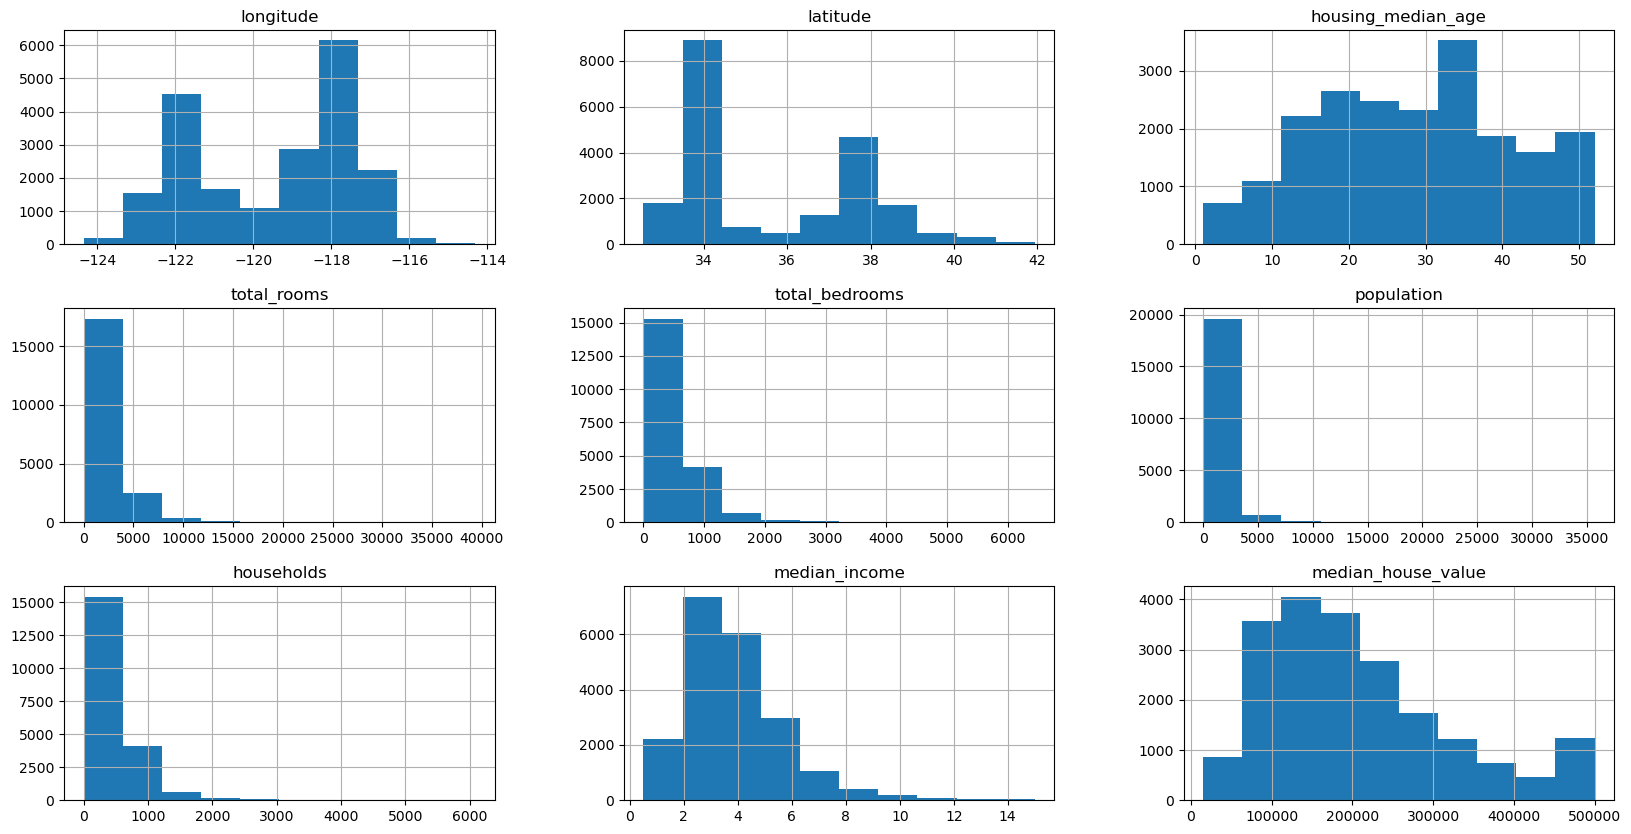

In [8]:
#get a historam of the data
# ancho por alto
data_changes.hist(figsize =(20,10))

### correlation

/tmp/ipykernel_20/2479144774.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_changes.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

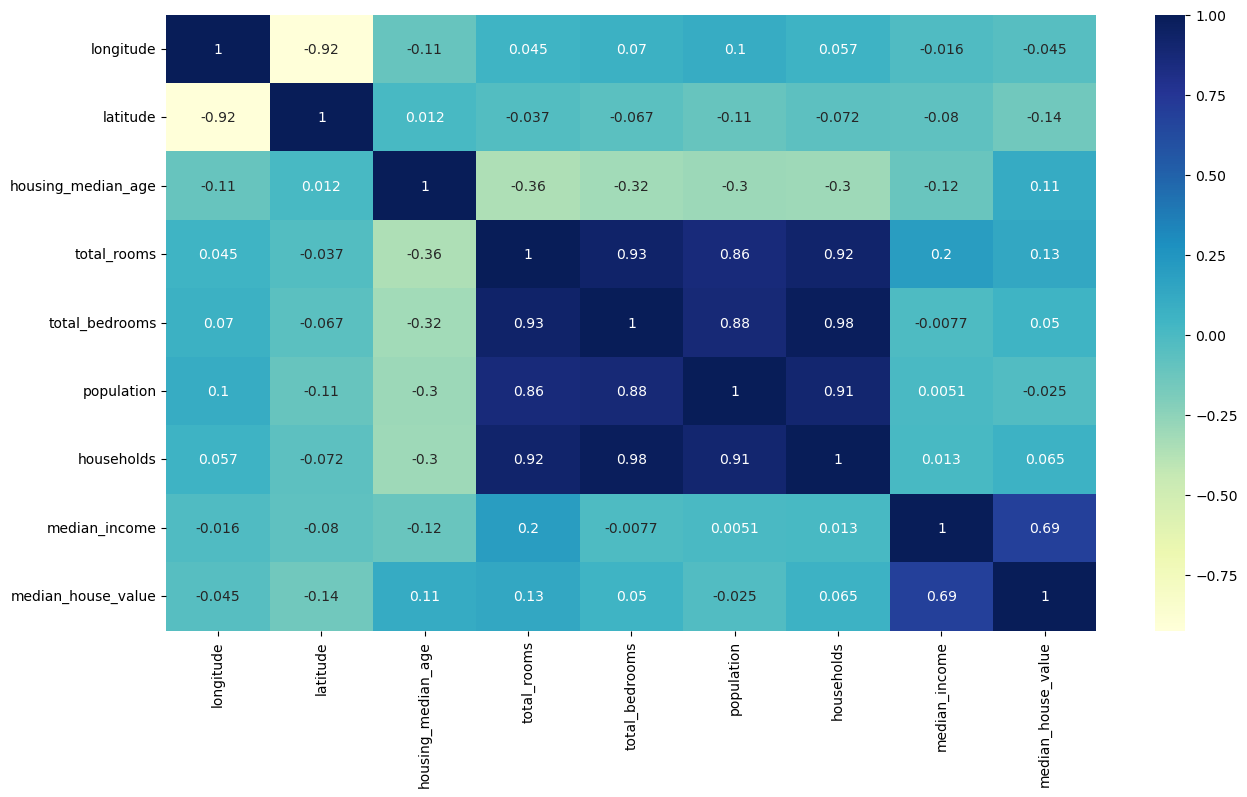

In [9]:
# check the correlation
plt.figure(figsize=(15,8))
sns.heatmap(data_changes.corr(), annot = True, cmap = "YlGnBu")

# data preprocessing

we convert some of the data to had a gausian bell curve

In [10]:
# to prevent 0 values we sume to 1
data_changes['total_rooms'] = np.log(data_changes['total_rooms'] + 1)
data_changes['total_bedrooms'] = np.log(data_changes['total_bedrooms'] + 1)
data_changes['population'] = np.log(data_changes['population'] + 1)
data_changes['households'] = np.log(data_changes['households'] + 1)


One hot encoder

In [11]:
#we count the values that we had on each
data_changes.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
#if the location its closer then 1 houre
#pandas onehot encoder
data_changes = data_changes.join(pd.get_dummies(data_changes['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)

verify the new variables correlation

<Axes: >

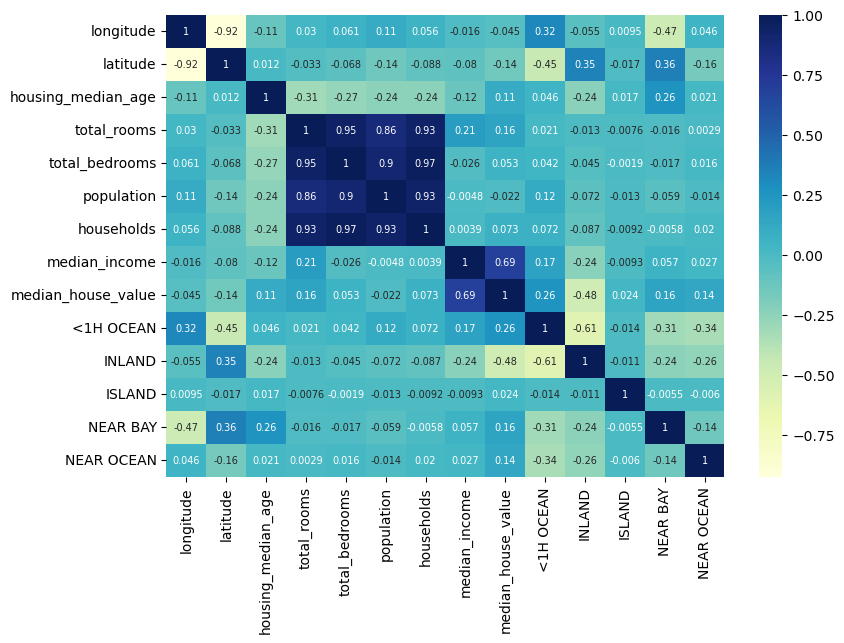

In [13]:
# check the correlation
plt.figure(figsize=(9,6))
sns.heatmap(data_changes.corr(), annot = True, cmap = "YlGnBu" , annot_kws={"fontsize": 7})

<Axes: xlabel='latitude', ylabel='longitude'>

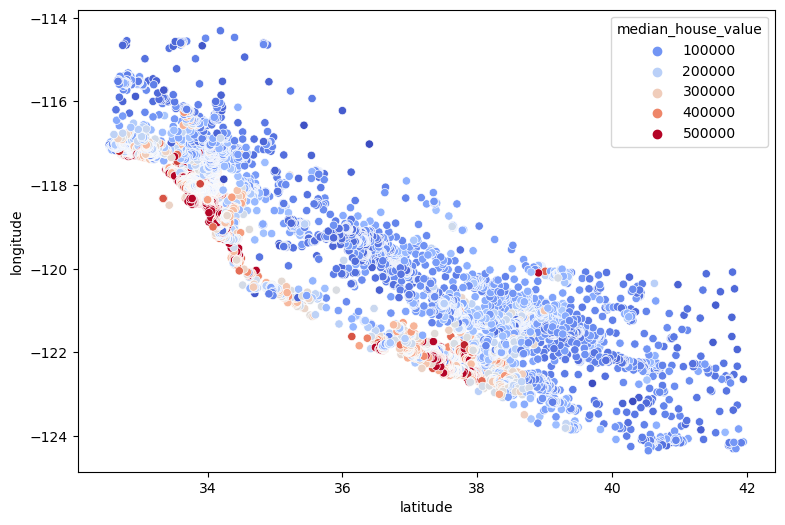

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = "latitude", y = "longitude", data  = data_changes, hue = "median_house_value", palette="coolwarm")


# Feature enginieering

In [15]:
# create a new metric
data_changes['bedroom_ratio'] = data_changes['total_bedrooms']/ data_changes['total_rooms']
data_changes['household_rooms'] = data_changes['total_rooms']/ data_changes['households']

# Training models

In [16]:
#separate the 2dataset for testing and validation
x = data_changes.drop(['median_house_value'], axis = 1)
y = data_changes['median_house_value']


In [17]:
x_train, x_test, y_train,  y_test = train_test_split(x,y, test_size = 0.2)

## Lineal regression

In [18]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

#### scale the data
with this we can had more presition adding more data to the same data

In [19]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
reg.fit(x_train_s, y_train)


LinearRegression()

# Evaluation of the test

In [20]:
score_noscaler = reg.score(x_test,  y_test)
print("R-squared score:", score_noscaler)

R-squared score: -2307.60452608862


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
x_test_s = scaler.transform(x_test)
scale_data_value =reg.score(x_test_s,  y_test)
print("R-squared score:", scale_data_value)

R-squared score: 0.6675197317876641


# Random Forest Model

In [22]:
#train the model
forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [23]:
print("R-squared score:",forest.score(x_test_s,  y_test) )

R-squared score: 0.8142929052095538


In [24]:
# cross validation next step
forest = RandomForestRegressor()
# iteration for all the hyperparameters
param_grid = {
    "n_estimators" : [3,30,100, 300,500],
    "max_features" : [2,10,30],
    "min_samples_split" : [5,12],
    "max_depth" : [None, 4,8]
}


grid_search = GridSearchCV(forest, param_grid, cv=5,
                         scoring ="neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 10, 30],
                         'min_samples_split': [5, 12],
                         'n_estimators': [3, 30, 100, 300, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
best_forest = grid_search.best_estimator_

In [26]:
best_forest.score(x_test_s,  y_test) 

0.8156687904651649